An Application that will help predict the change in a student's test score based on taking a test preparation class and their parent's level of education

In [26]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets


This will read the dataset into the program

In [27]:
data_df = pd.read_csv("test_scores2.csv")

Displays a small portion of the raw data

In [28]:
data_df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Gives a breakdown of the test scores for each subject

In [29]:
data_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Further breakdown of the test scores verses having taken a prep course or not

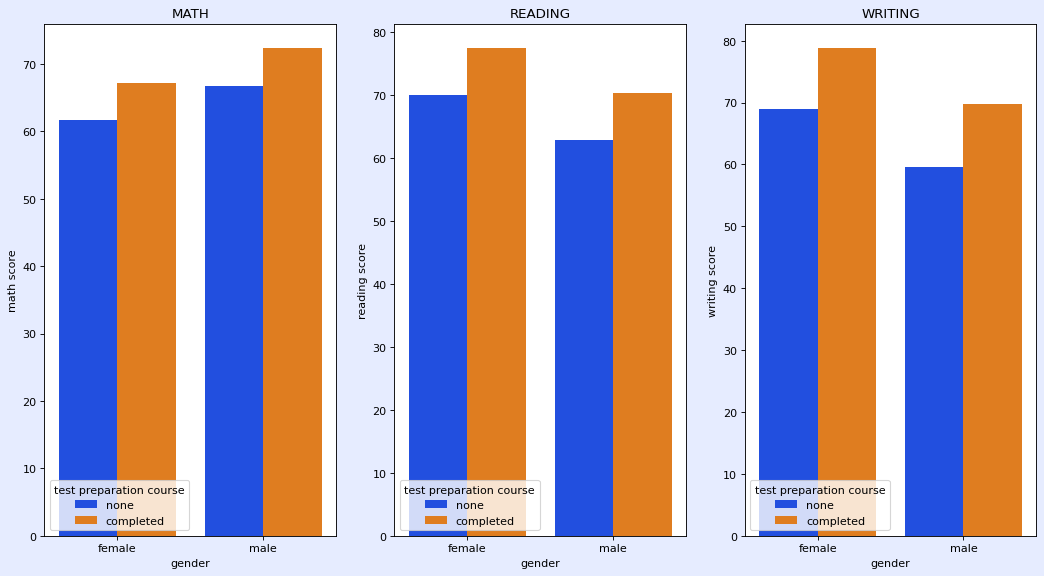

In [30]:
plt.rcParams['figure.facecolor'] = "#e6ecff"
plt.rcParams['axes.facecolor'] = "#e6ecff"
plt.figure(figsize=(16,8))
plt.style.use('default')
plt.subplot(1, 3, 1)
sns.barplot(x='gender',y='math score',data=data_df,hue='test preparation course',palette='bright', errorbar=None)
plt.title('MATH' ,color='black')
plt.legend(loc='lower left', title='test preparation course')
plt.subplot(1, 3, 2)
sns.barplot(x='gender',y='reading score',data=data_df,hue='test preparation course',palette='bright', errorbar=None)
plt.title('READING' ,color='black')
plt.legend(loc='lower left', title='test preparation course')
plt.subplot(1, 3, 3)
sns.barplot(x='gender',y='writing score',data=data_df,hue='test preparation course',palette='bright', errorbar=None)
plt.title('WRITING' ,color='black')
plt.legend(loc='lower left', title='test preparation course')
plt.show()

Breakdown of the parent's level of education for the data set

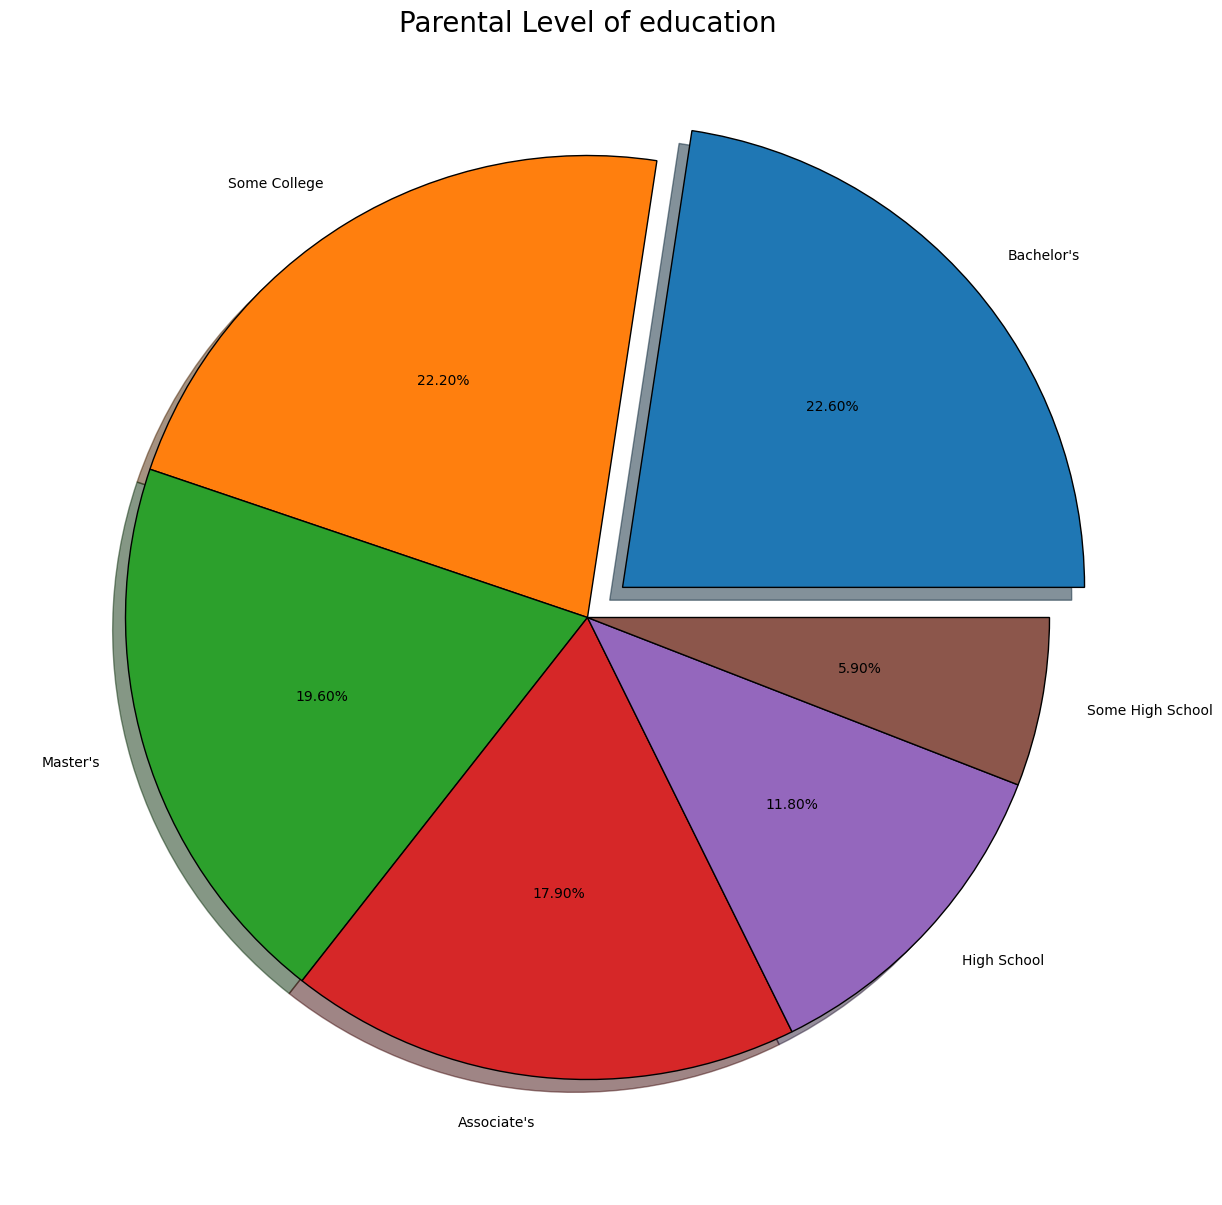

In [31]:
data=data_df['parental level of education'].value_counts()
plt.style.use('default')
labels=['Bachelor\'s', 'Some College', 'Master\'s', 'Associate\'s', 'High School', 'Some High School']
explode=[0.1, 0, 0, 0, 0, 0]
plt.figure(figsize=(30,15))
plt.pie(data, labels=labels ,radius=1 ,autopct='%0.2f%%', explode=explode, shadow=True, wedgeprops={'edgecolor':'black'})
plt.title('Parental Level of education' ,fontsize=20 ,color='black')
plt.show()

Levels of education and cumulative score ranges

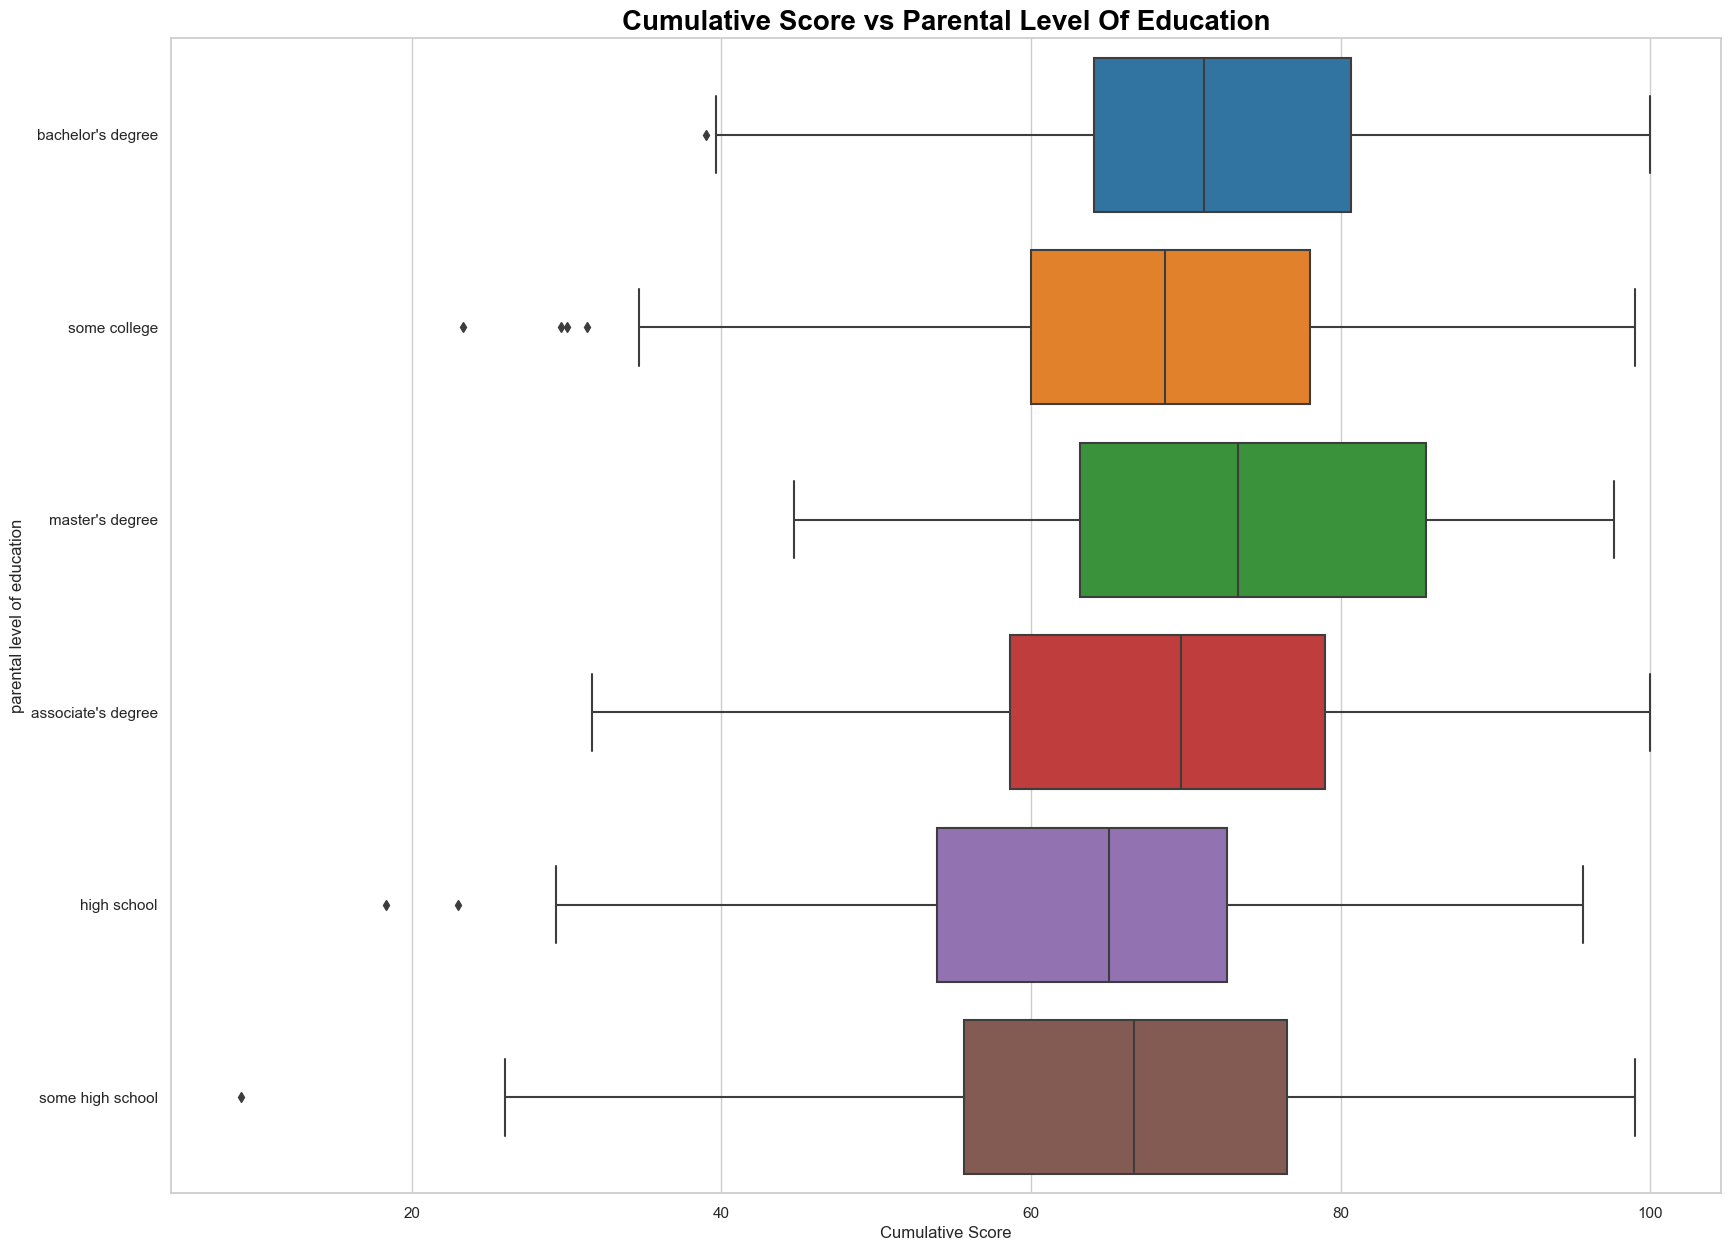

In [32]:
data_df['Cumulative Score'] = (data_df['math score']+data_df['reading score']+data_df['writing score'])/3
sns.set_style('whitegrid')
sns.set_context("notebook",font_scale=1)
plt.figure(figsize=(20,15))
sns.boxplot(data=data_df, x='Cumulative Score', y='parental level of education')
plt.title('Cumulative Score vs Parental Level Of Education',fontsize=20, fontweight='bold', color='black')

plt.show()

All scores for math, writing, reading, and cumulative plus all education levels to give an idea of where everyone falls

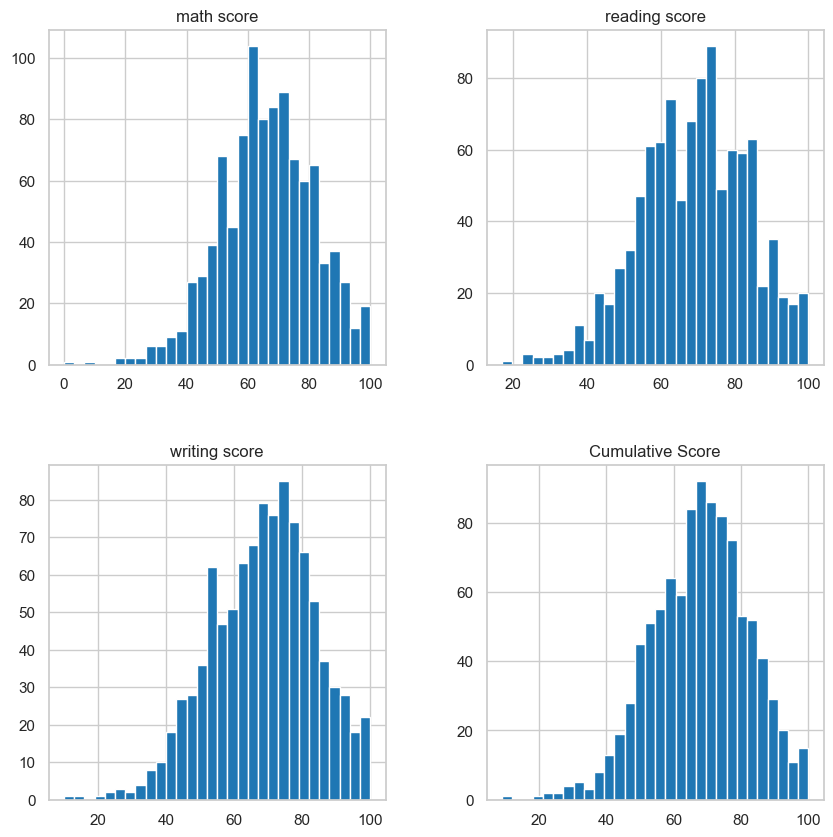

In [33]:
data_df.hist(bins = 30, figsize=(10,10))
plt.show()

A more refined look at test scores with and without the test prep class

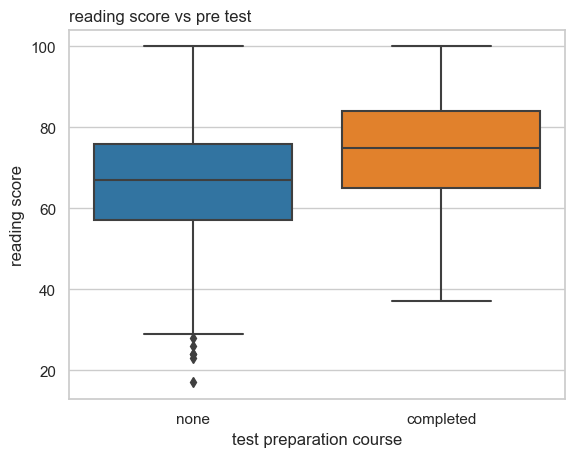

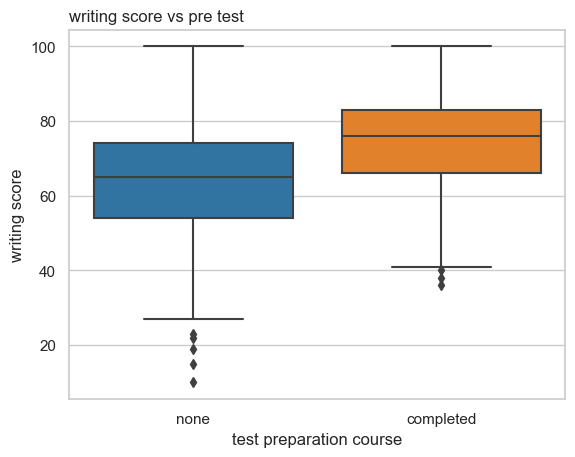

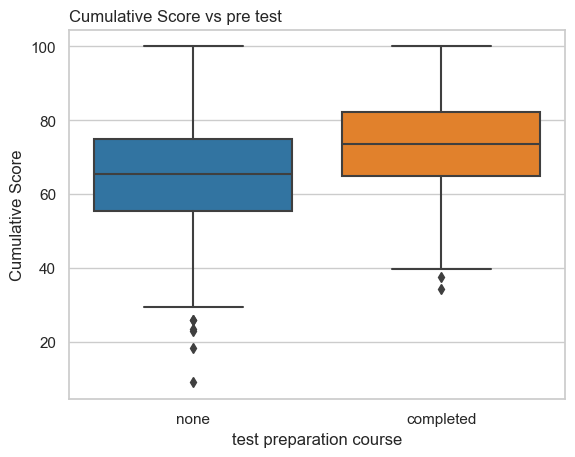

In [34]:
for item in data_df.columns[-3:]:
    sns.boxplot(x=data_df["test preparation course"], y=data_df[item])
    plt.title(item+" vs pre test", loc="left")
    plt.show()

Code to display projected change in scores when a test preparation class is taken

In [35]:
def display(education_level):
    plt.style.use('classic')
    get(education_level).plot(title='Projected Score change', figsize=(12,8))
    plt.xlabel('No Prep course ---->> Taken Prep course')
    plt.legend(loc='lower right')

Function to model projected change in scores based on parental level of education and test preparation

In [36]:
def get(education_level):
    temp1 = data_df.loc[(data_df['test preparation course'] == 'none') & (data_df['parental level of education'] == education_level)]
    dataFrame1 = temp1.groupby('parental level of education').mean(numeric_only=True).round(2)
    temp2 = data_df.loc[(data_df['test preparation course'] == 'completed') & (data_df['parental level of education'] == education_level)]
    dataFrame2 = temp2.groupby('parental level of education').mean(numeric_only=True).round(2)
    result = dataFrame1.compare(dataFrame2, align_axis=0).rename(index={'self': 'No Test Prep', 'other': 'With Test Prep'})
    return result

In [37]:
educationSelection = widgets.Dropdown(options =['some high school', 'high school', 'some college',
                                             "bachelor's degree", "associate's degree", "master's degree"],
                                     value="bachelor's degree", description="Average Parental Education Level",
                                     style=dict(description_width='initial'),  layout=dict(width='350px'))

Widgets to select which education level you wish to see the changes

In [39]:
widgets.interact(get, education_level = educationSelection)
widgets.interact(display, education_level = educationSelection)

interactive(children=(Dropdown(description='Average Parental Education Level', index=2, layout=Layout(width='3…

interactive(children=(Dropdown(description='Average Parental Education Level', index=2, layout=Layout(width='3…

<function __main__.display(education_level)>

In [40]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.ensemble import RandomForestRegressor

Creating a total score of all tests

In [41]:
data_df['total score'] = (data_df['math score']+data_df['reading score']+data_df['writing score'])

Changing all data into a numerical value

In [42]:
data_df1=pd.get_dummies(data_df[data_df.columns[:5]], drop_first=True)
data_df1.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,1,1


In [43]:
data_df.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course'], axis=1, inplace=True)
data_df=pd.concat([data_df1, data_df], axis=1)
data_df.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,math score,reading score,writing score,Cumulative Score,total score
0,0,1,0,0,0,1,0,0,0,0,1,1,72,72,74,72.666667,218
1,0,0,1,0,0,0,0,0,1,0,1,0,69,90,88,82.333333,247
2,0,1,0,0,0,0,0,1,0,0,1,1,90,95,93,92.666667,278
3,1,0,0,0,0,0,0,0,0,0,0,1,47,57,44,49.333333,148
4,1,0,1,0,0,0,0,0,1,0,1,1,76,78,75,76.333333,229


Here we split the data into a training set and a test set

In [44]:
X=data_df.drop(['total score'], axis=1)
y=data_df['total score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Here we create a regressor object and fit it with x and y data then predict the test data values

In [45]:

RFreg = RandomForestRegressor(n_estimators = 100)


RFreg.fit(X_train,y_train) 

prediction = RFreg.predict(X_test)


regression score and plot of how well the model fit

Score For Train Data : 0.9998286961379858
Score For Test Data : 0.9998868195936215
The mean absolute error: 0.1642333333333329
The mean squared error: 0.14753366666666626
The root mean squared error: 0.384101115159363




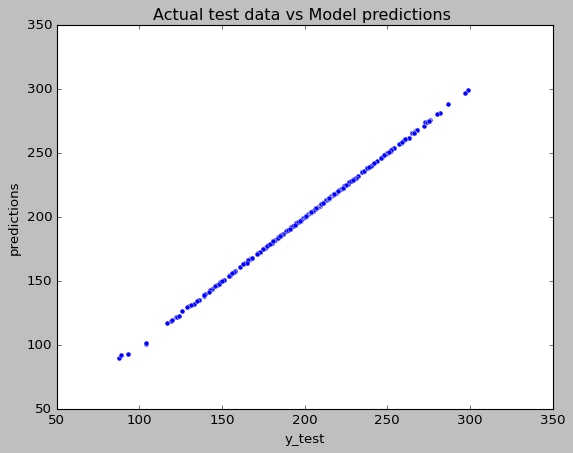

In [46]:

print('Score For Train Data : {}'.format(RFreg.score(X_train,y_train)))
print('Score For Test Data : {}'.format(RFreg.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, pred3))
print('The mean squared error:', metrics.mean_squared_error(y_test, pred3))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, pred3)))
print('\n')

sns.scatterplot(x=y_test, y=prediction);
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual test data vs Model predictions ')
plt.show()